# Problem Statement:
### In this assignment We have to compress racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look for quality difference.

In [1]:
# Import libraries/package
import numpy as np
from sklearn import cluster, datasets
from scipy import misc
from skimage.measure import compare_ssim as ssim
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### import data

In [2]:
#Get a 1024 x 768, gray image of a raccoon face.
face = misc.face(gray=True)

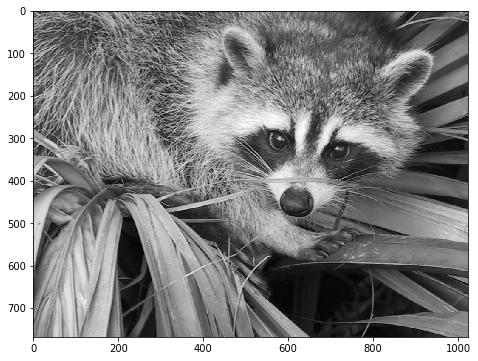

In [4]:
# showing the image
plt.gray()
plt.figure(figsize=(10,6))
plt.imshow(face)
plt.show()

In [7]:
# shape of the image
face.shape

(768, 1024)

In [8]:
type(face)

numpy.ndarray

In the problem statement it's mentioned that image should be compressed into 5 clusters. so we're going to use k means clustering to comress image into 5 clusters.

In [9]:
n= 5
kmeans= cluster.KMeans(n_clusters=n,n_init=10,max_iter=200, random_state=0)


In [11]:
#Fitting with input
kmeans.fit(face)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [14]:
#Rows and Columns size of the face image 
rows = face.shape[0]
cols = face.shape[1]

In [16]:
# as we get error that we can't reshape the array. we need to go back and do same reshaping of the image before clustring.

In [18]:
face.shape[0]*face.shape[1]

786432

In [19]:
image= face.reshape(face.shape[0]*face.shape[1],1) # Here we have reshaped the image to only 1 columns so that we can assign clusers to this column

In [20]:
image.shape

(786432, 1)

In [21]:
#Fitting with input
kmeans.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [22]:
rows

768

In [46]:
kmeans.labels_

array([0, 0, 4, ..., 4, 4, 4])

In [45]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4])

In [24]:
# again, 
#KMeans labels as array
labels = np.asarray(kmeans.labels_,dtype=np.uint8 ) 
#Reshaping the labels with shape of face image
face_compressed = labels.reshape(rows,cols)

In [25]:
face_compressed.shape # comressed image of the raccoon

(768, 1024)

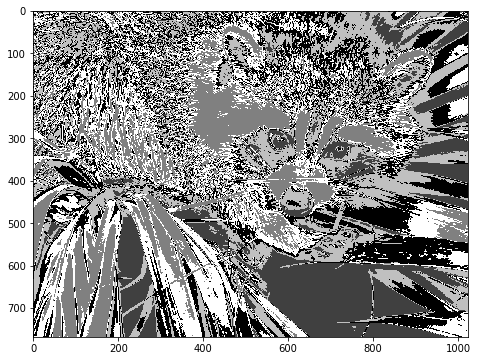

In [26]:
# compressed raccoon face image.
plt.gray()
plt.figure(figsize=(10,6))
plt.imshow(face_compressed)

### After compression we see that image is changed completely and now the task is to show the comparison of the two images.

In [28]:
# mean squared error can be determined if we take the difference of the two numpy arrays and then square them and finally add them.
# 
face.astype("float")

array([[114., 130., 145., ..., 119., 129., 137.],
       [ 83., 104., 123., ..., 118., 134., 146.],
       [ 68.,  88., 109., ..., 119., 134., 145.],
       ...,
       [ 98., 103., 116., ..., 144., 143., 143.],
       [ 94., 104., 120., ..., 143., 142., 142.],
       [ 94., 106., 119., ..., 142., 141., 140.]])

In [30]:
face_compressed.astype("float")

array([[0., 0., 4., ..., 0., 0., 4.],
       [3., 0., 0., ..., 0., 4., 4.],
       [3., 3., 0., ..., 0., 4., 4.],
       ...,
       [0., 0., 0., ..., 4., 4., 4.],
       [0., 0., 0., ..., 4., 4., 4.],
       [0., 0., 0., ..., 4., 4., 4.]])

In [39]:
# we define a function which takes two inputs image1 and image2 and returns the mean squared error.

def mse(image1, image2):
    err = np.sum((image1.astype("float") - image2.astype("float")) ** 2)
    err /= float(image1.shape[0] * image1.shape[1])
    #  returns mean squred error which shows the desimilarity between two images.
    return err

In [40]:
# Define a function to plot images

def compare_(image1, image2, title):
#Computes the mean squared error and structural similarity index for the images
    m = mse(image1, image2)
    # structural similarity index of the two images
    s = ssim(image1, image2)
    
 
    #Setup the figure
    fig = plt.figure(figsize=(16,9))
    plt.title(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))    
 
    #Shows first image
    ax = fig.add_subplot(1, 2, 1)    
    plt.imshow(image1, cmap = plt.cm.gray)
    plt.axis("off")
 
    #Shows the second image
    ax = fig.add_subplot(1, 2, 2)    
    plt.imshow(image2, cmap = plt.cm.gray)
    plt.axis("off")
 
    #Shows the images   
    plt.show()

In [42]:
print("Mean Squared Error:", mse(face, face_compressed))
print("Structural Similarity Index:", ssim(face, face_compressed))


Mean Squared Error: 15373.047201792398
Structural Similarity Index: 0.022887438517321303


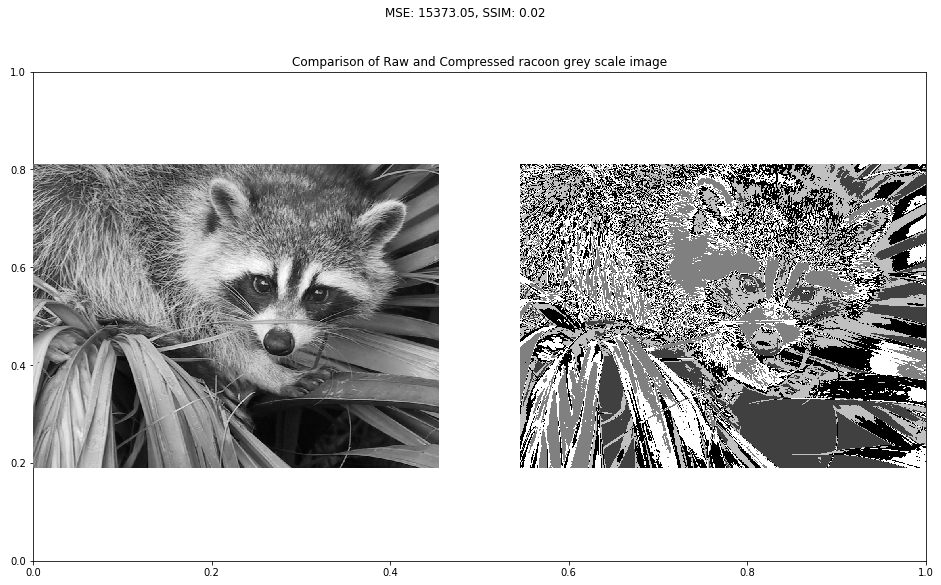

In [41]:
# calling the funtion to show the plots

compare_(face, face_compressed, "Comparison of Raw and Compressed racoon grey scale image")
